<a href="https://colab.research.google.com/github/Pratyay-Bera/Projects/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader as pdr

In [ ]:
import yfinance as yf
import datetime as dt

stock = "TSLA"
start = dt.datetime(2010, 7, 1)
end = dt.datetime(2020, 7, 1)
df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500
2010-07-07,1.053333,1.108667,0.998667,1.093333,103825500
2010-07-08,1.164000,1.168000,1.038000,1.076000,115671000


In [ ]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-06-24,64.056664,66.725334,63.542667,66.274002,164394000
2020-06-25,65.732002,65.732002,62.476665,63.618000,138817500
2020-06-26,63.982666,66.333336,63.658001,66.318665,132823500
2020-06-29,67.290001,67.333336,63.234669,64.600670,135396000
2020-06-30,71.987335,72.512665,66.915337,67.099998,253777500


In [ ]:
df1=df.reset_index()['Close']

In [ ]:
df1

Ticker,TSLA
0,1.464000
1,1.280000
2,1.074000
3,1.053333
4,1.164000
...,...
2512,64.056664
2513,65.732002
2514,63.982666
2515,67.290001


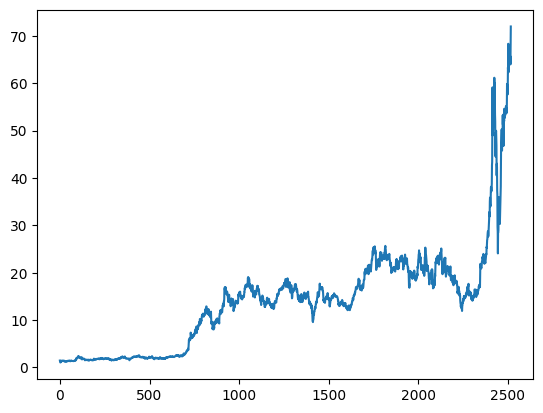

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[5.78942299e-03]
 [3.19546227e-03]
 [2.91354728e-04]
 ...
 [8.87153284e-01]
 [9.33778806e-01]
 [1.00000000e+00]]


In [ ]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size, test_size

(1761, 756)

In [ ]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 150
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1610, 150)
(1610,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(605, 150)
(605,)


(None, None)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(150,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 150, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 150, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 352ms/step - loss: 0.0075 - val_loss: 0.0060
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 260ms/step - loss: 4.7909e-04 - val_loss: 0.0048
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 328ms/step - loss: 1.9823e-04 - val_loss: 0.0047
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 279ms/step - loss: 1.7406e-04 - val_loss: 0.0044
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 302ms/step - loss: 1.8007e-04 - val_loss: 0.0040
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 299ms/step - loss: 1.7689e-04 - val_loss: 0.0036
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 259ms/step - loss: 1.6348e-04 - val_loss: 0.0032
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 337ms/step - loss: 1.4399e-04 - val_loss: 0.0033
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 261ms/step - loss: 1.4572e-04 - val_loss: 0.0039
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 259ms/step - loss: 1.5461e-04 - val_loss: 0.0034
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 287ms/step - loss: 1.1887e-04 - val_loss: 0.003

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.17.1'

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

11.834840153198037

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

27.75479609682329

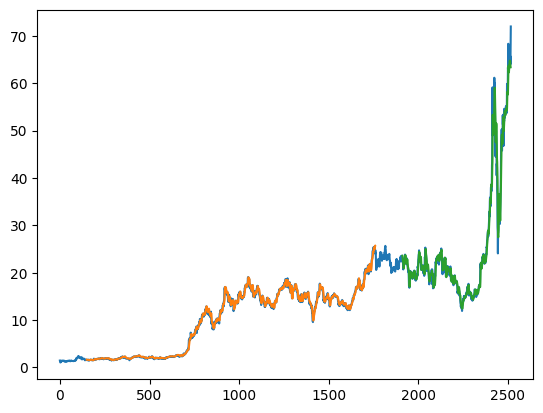

In [ ]:
look_back=150
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [ ]:
len(test_data)

756

In [ ]:
x_input=test_data[606:].reshape(1,-1)
x_input.shape

(1, 150)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.30125656038863213,
 0.294282936482572,
 0.2965103724262855,
 0.2952415852460051,
 0.29987500049114546,
 0.30112499221855815,
 0.2981456843820162,
 0.2956457278162508,
 0.3008336492545786,
 0.30425463678898185,
 0.3130045788808705,
 0.3166323432858785,
 0.3231924403397891,
 0.32198006640717175,
 0.3436997583167602,
 0.34134078109203253,
 0.3546489028394709,
 0.36488379326414866,
 0.3663405349731062,
 0.3791505637750202,
 0.38481780959506456,
 0.3901655058272979,
 0.3896391793688821,
 0.3749024956472578,
 0.37831409889975715,
 0.3895264066516758,
 0.4015093817492906,
 0.4095262205121587,
 0.42599222034291223,
 0.4476837594067889,
 0.43753346196454584,
 0.43453538556419613,
 0.4784353252012817,
 0.4907096432628759,
 0.47245794096439003,
 0.4677493439077788,
 0.4649392220361062,
 0.49943137873093313,
 0.5204462546025121,
 0.5229274157154099,
 0.5159913827150852,
 0.509600444736984,
 0.517946217369567,
 0.5311885953655583,
 0.5874099089190571,
 0.5965827352559394,
 0.7182263146564714,
 0

In [ ]:
from numpy import array

lst_output=[]
n_steps=150
i=0
while(i<30):

    if(len(temp_input)>150):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[0.9280809]
151
1 day input [0.29428294 0.29651037 0.29524159 0.299875   0.30112499 0.29814568
 0.29564573 0.30083365 0.30425464 0.31300458 0.31663234 0.32319244
 0.32198007 0.34369976 0.34134078 0.3546489  0.36488379 0.36634053
 0.37915056 0.38481781 0.39016551 0.38963918 0.3749025  0.3783141
 0.38952641 0.40150938 0.40952622 0.42599222 0.44768376 0.43753346
 0.43453539 0.47843533 0.49070964 0.47245794 0.46774934 0.46493922
 0.49943138 0.52044625 0.52292742 0.51599138 0.50960044 0.51794622
 0.5311886  0.58740991 0.59658274 0.71822631 0.81884566 0.67565152
 0.68905367 0.68821721 0.71003091 0.71294439 0.70628096 0.74078247
 0.73705135 0.79190981 0.8473792  0.8304527  0.83194703 0.76878033
 0.73693852 0.71709848 0.62330239 0.61295473 0.68403494 0.68581123
 0.68956118 0.66610273 0.6463097  0.5565737  0.59165795 0.58122575
 0.51197824 0.49888628 0.40344545 0.38947002 0.3246398  0.38706401
 0.38696065 0.39331397 0.45977012 0.49195966 0.48153682 0.46856704
 0.45707277 0.47762709 0.43774024 0

In [ ]:
day_new=np.arange(1,151)
day_pred=np.arange(151,181)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

2517

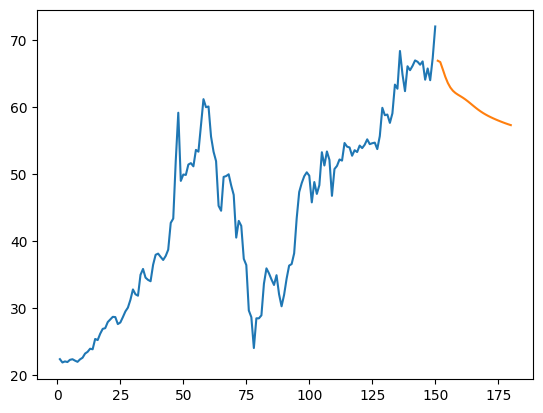

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[2367:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

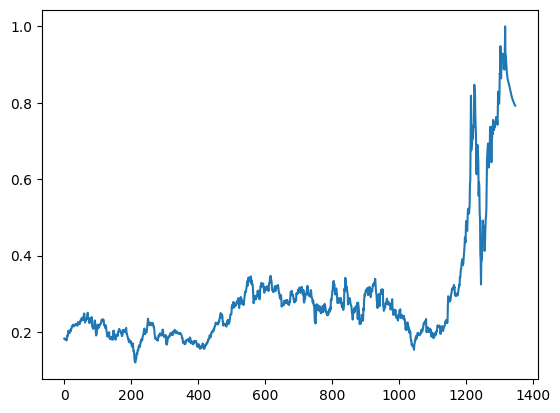

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])


In [ ]:
df3=scaler.inverse_transform(df3).tolist()

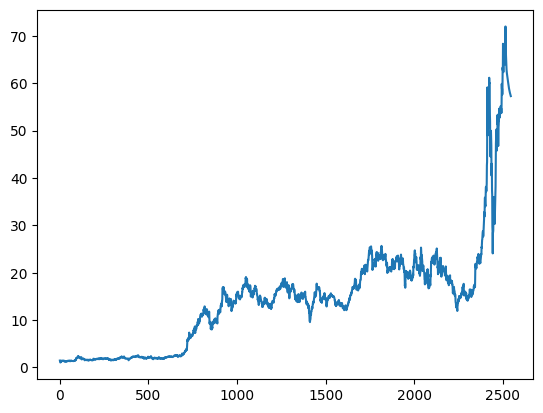

In [ ]:
plt.plot(df3)